<a href="https://colab.research.google.com/github/suryarout1261/WEEK1/blob/main/Crop_Fertilizer_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from google.colab import files

In [2]:
uploaded = files.upload()
crop_df = pd.read_csv("24f8996b599028111827.csv")
X_crop = crop_df.drop("label", axis=1)
y_crop = crop_df["label"]

Saving 24f8996b599028111827.csv to 24f8996b599028111827.csv


In [3]:
y_crop_enc = LabelEncoder().fit_transform(y_crop)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_crop, y_crop_enc, test_size=0.2, random_state=42)

In [4]:
crop_model = RandomForestClassifier()
crop_model.fit(Xc_train, yc_train)

RandomForestClassifier()

In [5]:
yc_pred = crop_model.predict(Xc_test)
print("--- Crop Recommendation ---")
print("Accuracy:", accuracy_score(yc_test, yc_pred))
print(classification_report(yc_test, yc_pred))

--- Crop Recommendation ---
Accuracy: 0.9954545454545455
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00 

In [6]:
uploaded = files.upload()
fert_df = pd.read_csv("b835ac31a79726111827.csv")

Saving b835ac31a79726111827.csv to b835ac31a79726111827.csv


In [7]:
fert_df_enc = fert_df.copy()
le_soil = LabelEncoder()
le_crop = LabelEncoder()
le_fert = LabelEncoder()
fert_df_enc['Soil Type'] = le_soil.fit_transform(fert_df['Soil Type'])
fert_df_enc['Crop Type'] = le_crop.fit_transform(fert_df['Crop Type'])
fert_df_enc['Fertilizer Name'] = le_fert.fit_transform(fert_df['Fertilizer Name'])

In [8]:
X_fert = fert_df_enc.drop("Fertilizer Name", axis=1)
y_fert = fert_df_enc["Fertilizer Name"]
scaler = StandardScaler()
X_fert_scaled = scaler.fit_transform(X_fert)

In [9]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_fert_scaled, y_fert, test_size=0.2, random_state=42)
fert_model = RandomForestClassifier()
fert_model.fit(Xf_train, yf_train)

RandomForestClassifier()

In [10]:
yf_pred = fert_model.predict(Xf_test)
print("\n--- Fertilizer Recommendation ---")
print("Accuracy:", accuracy_score(yf_test, yf_pred))
print(classification_report(yf_test, yf_pred))


--- Fertilizer Recommendation ---
Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
sample_crop_input = pd.DataFrame({
    'N': [90],
    'P': [42],
    'K': [43],
    'temperature': [20.5],
    'humidity': [80.0],
    'ph': [6.5],
    'rainfall': [200.0]
})
crop_pred = crop_model.predict(sample_crop_input)
crop_label = LabelEncoder().fit(y_crop).inverse_transform(crop_pred)
print("\nPredicted Crop:", crop_label[0])



Predicted Crop: rice


In [12]:

# Example input for fertilizer prediction (matching training column order exactly)
sample_fert_input = pd.DataFrame([X_fert.columns]).drop(0).astype(float)
sample_fert_input.loc[0] = [25, 50, 40, le_soil.transform(['Loamy'])[0], le_crop.transform(['Sugarcane'])[0], 90, 40, 45]
sample_fert_scaled = scaler.transform(sample_fert_input)
fert_pred = fert_model.predict(sample_fert_scaled)
fert_label = le_fert.inverse_transform(fert_pred)
print("Predicted Fertilizer:", fert_label[0])


Predicted Fertilizer: 10-26-26


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
# prompt: provide the code to get the accuracy of this model

print("--- Fertilizer Recommendation ---")
print("Accuracy:", accuracy_score(yf_test, yf_pred))
print(classification_report(yf_test, yf_pred))

--- Fertilizer Recommendation ---
Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


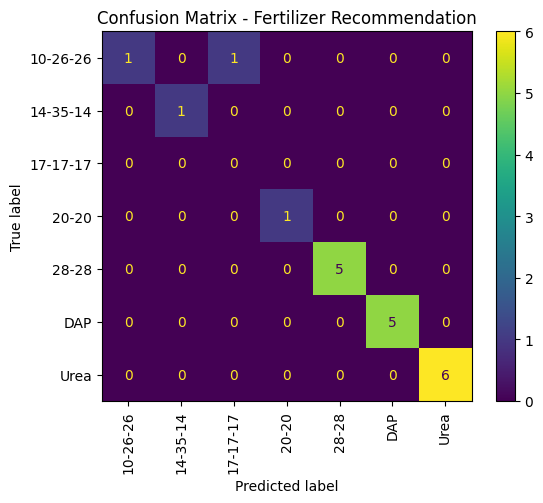

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Predict using trained model (already done)
y_pred_fert = fert_model.predict(Xf_test) # Renamed for clarity

# Confusion matrix
# Use yf_test and y_pred_fert for the fertilizer confusion matrix
cm_fert = confusion_matrix(yf_test, y_pred_fert)

# Use the labels from the fertilizer LabelEncoder (le_fert) for the display
disp_fert = ConfusionMatrixDisplay(confusion_matrix=cm_fert, display_labels=le_fert.classes_)
disp_fert.plot(xticks_rotation=90)
plt.title("Confusion Matrix - Fertilizer Recommendation")
plt.show()

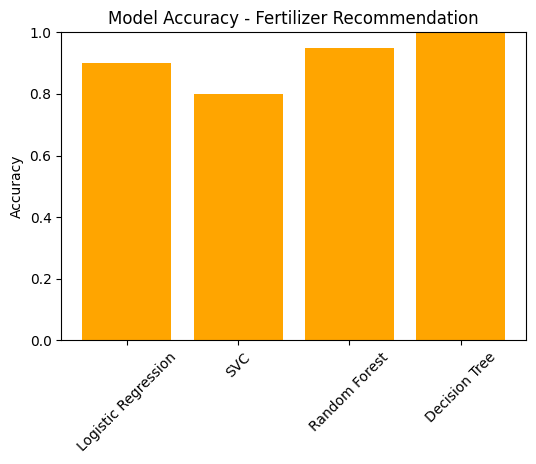

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Import necessary classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # Already imported earlier, but good practice to have here if used in this block

models_fert = {
    "Logistic Regression": LogisticRegression(),
    "SVC": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

acc_fert = []

for name, clf in models_fert.items():
    clf.fit(Xf_train, yf_train) # Using Xf_train and yf_train
    acc = clf.score(Xf_test, yf_test) # Using Xf_test and yf_test
    acc_fert.append((name, acc))

# Plot
labels_fert, values_fert = zip(*acc_fert)

plt.figure(figsize=(6, 4))
plt.bar(labels_fert, values_fert, color='orange')
plt.title("Model Accuracy - Fertilizer Recommendation")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [27]:
sample_input_crop = [[90, 42, 43, 20.5, 82.0, 6.5, 200]]  # [N, P, K, temp, humidity, pH, rainfall]
predicted_crop = crop_model.predict(sample_input_crop)
print("Recommended Crop:", LabelEncoder().fit(y_crop).inverse_transform(predicted_crop)[0])

Recommended Crop: rice


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [29]:
sample_fert_input = pd.DataFrame(columns=X_fert.columns)
sample_fert_input.loc[0] = [90, 40, 50, le_soil.transform(['Loamy'])[0], le_crop.transform(['Sugarcane'])[0], 25.0, 60.0, 150.0]
sample_fert_scaled = scaler.transform(sample_fert_input)
predicted_fert = fert_model.predict(sample_fert_scaled)
print("Recommended Fertilizer:", le_fert.inverse_transform(predicted_fert)[0])

Recommended Fertilizer: DAP
